<a href="https://colab.research.google.com/github/AmishaMurarka/Sentiment-Analysis-of-Song-Lyrics/blob/main/Song_Lyrics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Music is a powerful language to express our feelings and in many cases is used as a therapy to deal with tough moments in our lives or as a tool to celebrate the joyous moments. The different sounds, rhythms, and effects used in music are capable to modify our emotions for a moment, but there’s a component that sometimes goes unnoticed when we are listening to music; The Lyrics of the songs. Lyrics are powerful texts that share the ideas that came from the mind of the author when the song was been created. 

# Objective
- Scraping the lyrics of Top 100 songs on Billboard Charts for past 10 years
- Cleaning and preprocessing the scraped data
- Using word clouds to analyse popular words
- Performing year wise analysis on the data
- Performing VADER Sentiment Analysis

# Scope
- The language of the songs is limited to English

# Data
- Original Data- 1100 rows and 7 columns
- Cleaned Data- 907 rows and 7 columns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.2 MB/s 
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3166262 sha256=33c99313ea2a012b68b8b9ed312e56979095648e8309b82187afac7693fb02c9
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
# Standard data processing libraries
import pandas as pd
import numpy as np

# Libraries for NLP
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Language Detection Library
import fasttext as ft

# Deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Embedding, Bidirectional

# Libraries for visualization
import plotly.express as px
import plotly.io as pio

# Setting template for all plots
pio.templates.default = "simple_white"

# Loading the Dataset

In [ ]:
# Using index_col = 0 to avoid getting Unnamed:0
df = pd.read_csv('/content/drive/MyDrive/Aegis/Song Lyrics Sentiment Analysis and Lyric Prediction/billboard_2012_to_2022_top_100_song_lyrics.csv')
df

Top100Year                     SongTitle  \
0           2012                 Call Me Maybe   
1           2012                      Payphone   
2           2012  Somebody That I Used To Know   
3           2012                    Wide Awake   
4           2012           Where Have You Been   
...          ...                           ...   
1095        2022                           N95   
1096        2022                  Love Me More   
1097        2022                     New Truck   
1098        2022          She's All I Wanna Be   
1099        2022                  Desesperados   

                                 Artist  LyricsStatus  \
0                      Carly Rae Jepsen          True   
1        Maroon 5 Featuring Wiz Khalifa          True   
2                Gotye Featuring Kimbra          True   
3                            Katy Perry          True   
4                               Rihanna          True   
...                                 ...           ...   
1095                     Kendrick Lamar          True   
1096                          Sam Smith          True   
1097                        Dylan Scott          True   
1098                         Tate McRae          True   
1099  Rauw Alejandro & Chencho Corleone          True   

                                                 Lyrics ReleaseYear  \
0     I threw a wish in the well\nDon't ask me, I'll...        2012   
1     I'm at a payphone trying to call home\nAll of ...        2012   
2     Now and then I think of when we were together\...        2011   
3     I'm wide awake\nI'm wide awake\nI'm wide awake...        2012   
4     I've been everywhere, man\nLooking for someone...        2011   
...                                                 ...         ...   
1095  Hello, new world, all the boys and girls\nI go...        2022   
1096  Have you ever felt like being somebody else?\n...        2022   
1097  I need a new truck\nThere ain't nothing wrong ...        2022   
1098  You want the girl with the small waist\nAnd th...        2022   
1099  ¿Qué me hizo usted?\nQue la quiero volver a ve...        2021   

                                                Genre  
0                                       R&B/Soul, Pop  
1                                       R&B/Soul, Pop  
2                                       R&B/Soul, Pop  
3                               R&B/Soul, Pop, UK R&B  
4     Dance-pop, R&B/Soul, Electro house, Pop, UK R&B  
...                                               ...  
1095                                     Pop, Country  
1096                                    R&B/Soul, Pop  
1097                                    R&B/Soul, Pop  
1098                                    R&B/Soul, Pop  
1099                                    R&B/Soul, Pop  

[1100 rows x 7 columns]

# EDA and Preprocessing

### Checking for null values

In [ ]:
# Checking for null values
df.info()
# We have lyrics for only 89 of the songs in top 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Top100Year    1100 non-null   int64 
 1   SongTitle     1100 non-null   object
 2   Artist        1100 non-null   object
 3   LyricsStatus  1100 non-null   bool  
 4   Lyrics        962 non-null    object
 5   ReleaseYear   1100 non-null   object
 6   Genre         1100 non-null   object
dtypes: bool(1), int64(1), object(5)
memory usage: 52.8+ KB


### Dropping rows with null values

In [ ]:
# Removing records where lyrics status=False as lyrics are not available
df1 = df[df['LyricsStatus'] == True]
# Dropping Lyrics Status as it is not required for analysis
df1.drop('LyricsStatus', inplace=True, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Top100Year   962 non-null    int64 
 1   SongTitle    962 non-null    object
 2   Artist       962 non-null    object
 3   Lyrics       962 non-null    object
 4   ReleaseYear  962 non-null    object
 5   Genre        962 non-null    object
dtypes: int64(1), object(5)
memory usage: 52.6+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Identifying language of the lyrics using FastText

In [ ]:
language = list()

# Load the facebook pretrained model
ft_model = ft.load_model("/content/drive/MyDrive/Aegis/Song Lyrics Sentiment Analysis and Lyric Prediction/lid.176.ftz")

def fasttext_language_predict(text, model = ft_model):
    text = text.replace('\n', " ")
    prediction = model.predict([text])
    return prediction

for lyrics in df1['Lyrics']:
    pred = fasttext_language_predict(lyrics)
    language.append(pred[0][0][0][-2:])

df1.loc[:,'Language'] = language
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Top100Year                     SongTitle  \
0           2012                 Call Me Maybe   
1           2012                      Payphone   
2           2012  Somebody That I Used To Know   
3           2012                    Wide Awake   
4           2012           Where Have You Been   
...          ...                           ...   
1095        2022                           N95   
1096        2022                  Love Me More   
1097        2022                     New Truck   
1098        2022          She's All I Wanna Be   
1099        2022                  Desesperados   

                                 Artist  \
0                      Carly Rae Jepsen   
1        Maroon 5 Featuring Wiz Khalifa   
2                Gotye Featuring Kimbra   
3                            Katy Perry   
4                               Rihanna   
...                                 ...   
1095                     Kendrick Lamar   
1096                          Sam Smith   
1097                        Dylan Scott   
1098                         Tate McRae   
1099  Rauw Alejandro & Chencho Corleone   

                                                 Lyrics ReleaseYear  \
0     I threw a wish in the well\nDon't ask me, I'll...        2012   
1     I'm at a payphone trying to call home\nAll of ...        2012   
2     Now and then I think of when we were together\...        2011   
3     I'm wide awake\nI'm wide awake\nI'm wide awake...        2012   
4     I've been everywhere, man\nLooking for someone...        2011   
...                                                 ...         ...   
1095  Hello, new world, all the boys and girls\nI go...        2022   
1096  Have you ever felt like being somebody else?\n...        2022   
1097  I need a new truck\nThere ain't nothing wrong ...        2022   
1098  You want the girl with the small waist\nAnd th...        2022   
1099  ¿Qué me hizo usted?\nQue la quiero volver a ve...        2021   

                                                Genre Language  
0                                       R&B/Soul, Pop       en  
1                                       R&B/Soul, Pop       en  
2                                       R&B/Soul, Pop       en  
3                               R&B/Soul, Pop, UK R&B       en  
4     Dance-pop, R&B/Soul, Electro house, Pop, UK R&B       en  
...                                               ...      ...  
1095                                     Pop, Country       en  
1096                                    R&B/Soul, Pop       en  
1097                                    R&B/Soul, Pop       en  
1098                                    R&B/Soul, Pop       en  
1099                                    R&B/Soul, Pop       es  

[962 rows x 7 columns]

### Filtering only english songs

In [ ]:
df1['Language'].value_counts()

en    928
es     29
ko      3
pt      1
hu      1
Name: Language, dtype: int64

In [ ]:
# es - Spanish
df_en = df1[df1['Language']=='en']
df_en

Top100Year                     SongTitle  \
0           2012                 Call Me Maybe   
1           2012                      Payphone   
2           2012  Somebody That I Used To Know   
3           2012                    Wide Awake   
4           2012           Where Have You Been   
...          ...                           ...   
1094        2022             F.N.F. (Let's Go)   
1095        2022                           N95   
1096        2022                  Love Me More   
1097        2022                     New Truck   
1098        2022          She's All I Wanna Be   

                              Artist  \
0                   Carly Rae Jepsen   
1     Maroon 5 Featuring Wiz Khalifa   
2             Gotye Featuring Kimbra   
3                         Katy Perry   
4                            Rihanna   
...                              ...   
1094              Hitkidd & Glorilla   
1095                  Kendrick Lamar   
1096                       Sam Smith   
1097                     Dylan Scott   
1098                      Tate McRae   

                                                 Lyrics ReleaseYear  \
0     I threw a wish in the well\nDon't ask me, I'll...        2012   
1     I'm at a payphone trying to call home\nAll of ...        2012   
2     Now and then I think of when we were together\...        2011   
3     I'm wide awake\nI'm wide awake\nI'm wide awake...        2012   
4     I've been everywhere, man\nLooking for someone...        2011   
...                                                 ...         ...   
1094  HitKidd, what it do man?\nGloRilla, mmm-hmm\nL...        2022   
1095  Hello, new world, all the boys and girls\nI go...        2022   
1096  Have you ever felt like being somebody else?\n...        2022   
1097  I need a new truck\nThere ain't nothing wrong ...        2022   
1098  You want the girl with the small waist\nAnd th...        2022   

                                                Genre Language  
0                                       R&B/Soul, Pop       en  
1                                       R&B/Soul, Pop       en  
2                                       R&B/Soul, Pop       en  
3                               R&B/Soul, Pop, UK R&B       en  
4     Dance-pop, R&B/Soul, Electro house, Pop, UK R&B       en  
...                                               ...      ...  
1094                                     Pop, Country       en  
1095                                     Pop, Country       en  
1096                                    R&B/Soul, Pop       en  
1097                                    R&B/Soul, Pop       en  
1098                                    R&B/Soul, Pop       en  

[928 rows x 7 columns]

### Removing repeating songs

In [ ]:
df_en.drop_duplicates(subset = ['SongTitle'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### Plotting popular artists in Top 100 Songs list

In [ ]:
pop_artist = pd.DataFrame(df_en.groupby(['Artist','Top100Year'])['SongTitle'].count())
pop_artist.columns = ['SongCount']
pop_artist = pop_artist[pop_artist['SongCount'] > 1]
pop_artist = pop_artist.reset_index()
pop_artist = pop_artist.sort_values(by=['Top100Year','SongCount'], ascending = False)

fig = px.bar(pop_artist, x = 'Artist', y = 'SongCount', color = 'Top100Year',
             labels = {'y':'No of songs in Top 100','x':'Artist Name'},
             title = 'Popular Artists in Top 100')
fig.show()

### Removing unnecessary characters from the lyrics

In [ ]:
import string
def text_cleansing(data):
    '''Removes brackets, replaces new line breaks with spaces, 
    lowercases everything, removes punctuations, extra whitespaces, and break words'''
    data = data.str.replace("[\(\[].*?[\)\]]", '')
    data = data.str.replace("\n", ' ')
    data = data.str.lower()
    data = data.str.replace('[{}]'.format(string.punctuation), '')
    #data = data.str.replace(' +', ' ')
    return data

df_en.loc[:,'rem_sp_char'] = text_cleansing(df_en.loc[:,'Lyrics'])
df_en

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Top100Year                     SongTitle  \
0           2012                 Call Me Maybe   
1           2012                      Payphone   
2           2012  Somebody That I Used To Know   
3           2012                    Wide Awake   
4           2012           Where Have You Been   
...          ...                           ...   
1094        2022             F.N.F. (Let's Go)   
1095        2022                           N95   
1096        2022                  Love Me More   
1097        2022                     New Truck   
1098        2022          She's All I Wanna Be   

                              Artist  \
0                   Carly Rae Jepsen   
1     Maroon 5 Featuring Wiz Khalifa   
2             Gotye Featuring Kimbra   
3                         Katy Perry   
4                            Rihanna   
...                              ...   
1094              Hitkidd & Glorilla   
1095                  Kendrick Lamar   
1096                       Sam Smith   
1097                     Dylan Scott   
1098                      Tate McRae   

                                                 Lyrics ReleaseYear  \
0     I threw a wish in the well\nDon't ask me, I'll...        2012   
1     I'm at a payphone trying to call home\nAll of ...        2012   
2     Now and then I think of when we were together\...        2011   
3     I'm wide awake\nI'm wide awake\nI'm wide awake...        2012   
4     I've been everywhere, man\nLooking for someone...        2011   
...                                                 ...         ...   
1094  HitKidd, what it do man?\nGloRilla, mmm-hmm\nL...        2022   
1095  Hello, new world, all the boys and girls\nI go...        2022   
1096  Have you ever felt like being somebody else?\n...        2022   
1097  I need a new truck\nThere ain't nothing wrong ...        2022   
1098  You want the girl with the small waist\nAnd th...        2022   

                                                Genre Language  \
0                                       R&B/Soul, Pop       en   
1                                       R&B/Soul, Pop       en   
2                                       R&B/Soul, Pop       en   
3                               R&B/Soul, Pop, UK R&B       en   
4     Dance-pop, R&B/Soul, Electro house, Pop, UK R&B       en   
...                                               ...      ...   
1094                                     Pop, Country       en   
1095                                     Pop, Country       en   
1096                                    R&B/Soul, Pop       en   
1097                                    R&B/Soul, Pop       en   
1098                                    R&B/Soul, Pop       en   

                                            rem_sp_char  
0     i threw a wish in the well dont ask me ill nev...  
1     im at a payphone trying to call home all of my...  
2     now and then i think of when we were together ...  
3     im wide awake im wide awake im wide awake yeah...  
4     ive been everywhere man looking for someone so...  
...                                                 ...  
1094  hitkidd what it do man glorilla mmmhmm let go ...  
1095  hello new world all the boys and girls i got s...  
1096  have you ever felt like being somebody else fe...  
1097  i need a new truck there aint nothing wrong wi...  
1098  you want the girl with the small waist and the...  

[907 rows x 8 columns]

### Removing stopwords and musical slangs from the lyrics

In [ ]:
def remove_stopwords(text):    # text is a list/series of string to clean
    clean_text = list()
    nltk.download('punkt')
    nltk.download('stopwords')
    
    words=["yeah","ya","na","wan","uh","gon","ima","mm","uhhuh","bout","em","nigga","niggas","got","ta","lil","ol","hey",
          "oooh","ooh","oh","youre","dont","im","youve","ive","theres","ill","yaka","lalalala","la","da","di","yuh",
          "shawty","oohooh","shoorah","mmmmmm","ook","bidibambambambam","shh","bro","ho","aint","cant","know","bambam",
          "shitll","tonka"]
    ignore= (stopwords.words('english') + words)
    
    for i in text:
        words = nltk.word_tokenize(i)
        #for i in range(len(words)):
        #    words = [w for w in words if w not in stopwords.words('english')]
        for element in ignore: # given the tokenized list, return a list that doesn't contain any of the elements
            words = list(filter(lambda x: x!= element and len(x) > 1, words))
        lyric = " ".join(words)
        clean_text.append(lyric)
    
    return clean_text
        
df_en['LyricsClean'] = remove_stopwords(df_en['rem_sp_char'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Generating a word cloud of all lyrics

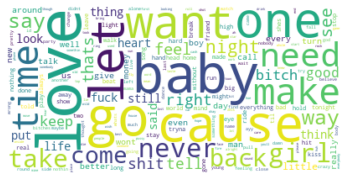

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(collocations = False, 
                      background_color = 'white').generate(' '.join(df_en['LyricsClean']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis using NLP

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

comp_score = []
sentiment = []

for i in df_en.loc[:,'LyricsClean']:
    sentiment.append(sia.polarity_scores(i))

# Compound score is the sum of positive, negative & neutral scores 
# which is then normalized between -1(most extreme negative) and +1 (most extreme positive).
df_en.loc[:,'sent_scores'] = sentiment
df_en.loc[:,'comp_score'] = df_en.loc[:,'sent_scores'].apply(lambda x: x['compound'])
df_en.loc[:,'sentiment'] = df_en.loc[:,'comp_score'].apply(lambda x: 'Positive' if x>=0.5 else 'Negative' if x<=-0.5 else 'Neutral') 
df_en

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Top100Year                     SongTitle  \
0           2012                 Call Me Maybe   
1           2012                      Payphone   
2           2012  Somebody That I Used To Know   
3           2012                    Wide Awake   
4           2012           Where Have You Been   
...          ...                           ...   
1094        2022             F.N.F. (Let's Go)   
1095        2022                           N95   
1096        2022                  Love Me More   
1097        2022                     New Truck   
1098        2022          She's All I Wanna Be   

                              Artist  \
0                   Carly Rae Jepsen   
1     Maroon 5 Featuring Wiz Khalifa   
2             Gotye Featuring Kimbra   
3                         Katy Perry   
4                            Rihanna   
...                              ...   
1094              Hitkidd & Glorilla   
1095                  Kendrick Lamar   
1096                       Sam Smith   
1097                     Dylan Scott   
1098                      Tate McRae   

                                                 Lyrics ReleaseYear  \
0     I threw a wish in the well\nDon't ask me, I'll...        2012   
1     I'm at a payphone trying to call home\nAll of ...        2012   
2     Now and then I think of when we were together\...        2011   
3     I'm wide awake\nI'm wide awake\nI'm wide awake...        2012   
4     I've been everywhere, man\nLooking for someone...        2011   
...                                                 ...         ...   
1094  HitKidd, what it do man?\nGloRilla, mmm-hmm\nL...        2022   
1095  Hello, new world, all the boys and girls\nI go...        2022   
1096  Have you ever felt like being somebody else?\n...        2022   
1097  I need a new truck\nThere ain't nothing wrong ...        2022   
1098  You want the girl with the small waist\nAnd th...        2022   

                                                Genre Language  \
0                                       R&B/Soul, Pop       en   
1                                       R&B/Soul, Pop       en   
2                                       R&B/Soul, Pop       en   
3                               R&B/Soul, Pop, UK R&B       en   
4     Dance-pop, R&B/Soul, Electro house, Pop, UK R&B       en   
...                                               ...      ...   
1094                                     Pop, Country       en   
1095                                     Pop, Country       en   
1096                                    R&B/Soul, Pop       en   
1097                                    R&B/Soul, Pop       en   
1098                                    R&B/Soul, Pop       en   

                                            rem_sp_char  \
0     i threw a wish in the well dont ask me ill nev...   
1     im at a payphone trying to call home all of my...   
2     now and then i think of when we were together ...   
3     im wide awake im wide awake im wide awake yeah...   
4     ive been everywhere man looking for someone so...   
...                                                 ...   
1094  hitkidd what it do man glorilla mmmhmm let go ...   
1095  hello new world all the boys and girls i got s...   
1096  have you ever felt like being somebody else fe...   
1097  i need a new truck there aint nothing wrong wi...   
1098  you want the girl with the small waist and the...   

                                            LyricsClean  \
0     threw wish well ask never tell looked fell way...   
1     payphone trying call home change spent times g...   
2     think together like said felt happy could die ...   
3     wide awake wide awake wide awake dark falling ...   
4     everywhere man looking someone someone please ...   
...                                                 ...   
1094  hitkidd man glorilla mmmhmm let go woo woo gan...   
1095  hello new world boys girls true stories tell b...   
1096  ever felt like somebody else fee

### Bar chart displaying number of songs with positive, negative and neutral sentiment

In [ ]:
song_sent = pd.DataFrame(df_en.groupby(['Top100Year','sentiment'])['SongTitle'].count())
song_sent.columns = ['SongCount']
#pop_artist = pop_artist[pop_artist['SongCount'] > 1]
song_sent = song_sent.reset_index()
song_sent = song_sent.sort_values(by=['Top100Year','SongCount'], ascending = False)

fig = px.bar(song_sent, x = 'Top100Year', y = 'SongCount', color = 'sentiment',
             labels = {'y':'No of songs','x':'Sentiment'},
             title = 'Top 100 Song Sentiments',
             height = 400, width = 900)
fig.show()

### Year wise song sentiment trend

In [ ]:
data = pd.DataFrame(df_en.value_counts(['Top100Year','sentiment']),columns = ['NoOfSongs']).reset_index()
data = data.sort_values(by="Top100Year")
fig = px.line(data, x="Top100Year", y="NoOfSongs", color='sentiment')
fig.show()

### Analysing popular words used in songs with positive and negative sentiments

In [ ]:
# Filtering songs with postive, negative and neutral sentiments seperately
pos_sent = df_en[df_en['sentiment']=='Positive']
neg_sent = df_en[df_en['sentiment']=='Negative']

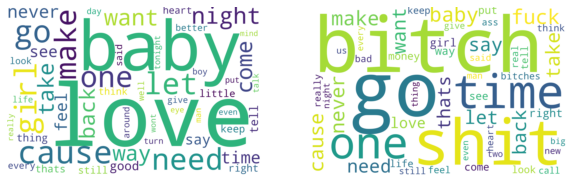

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
wordcloud1 = WordCloud(collocations = False, 
                      background_color = 'white',max_words = 50,
                      width=3000, height=2000).generate(' '.join(pos_sent['LyricsClean']))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")

plt.subplot(1,2,2)
wordcloud2 = WordCloud(collocations = False, 
                      background_color = 'white',max_words = 50,
                      width=3000, height=2000).generate(' '.join(neg_sent['LyricsClean']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

### Analysing popular words used in songs with negative sentiments by year

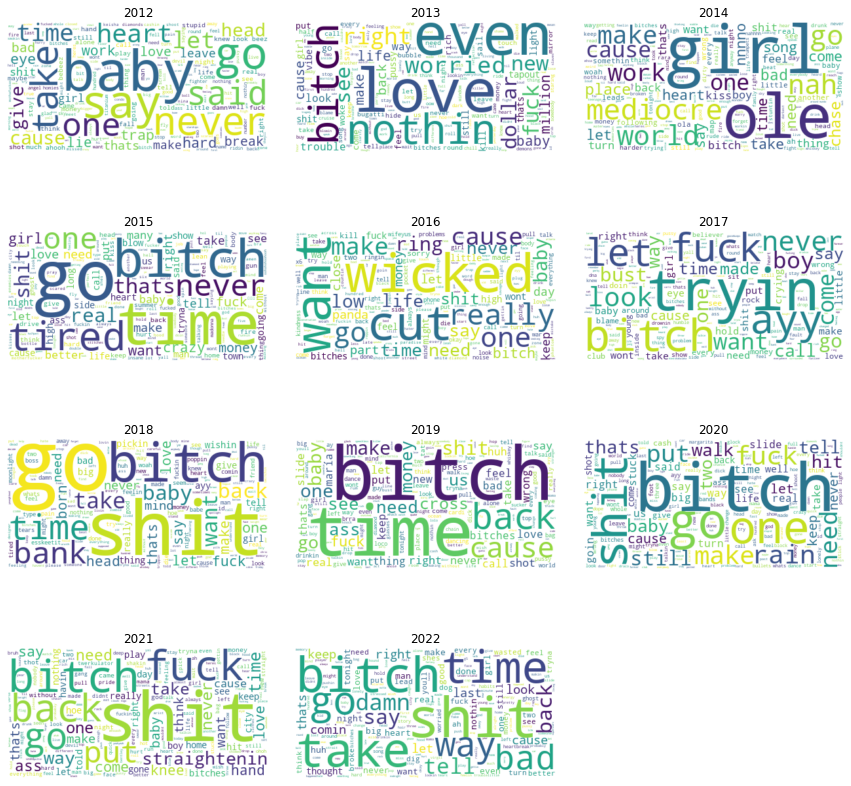

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
index=1
year = [i for i in range(2012,2023)]
plt.figure(figsize=(15,15))
for y in year:
    d = neg_sent[neg_sent['Top100Year']==y]
    wordcloud = WordCloud(collocations = False, 
                          background_color = 'white').generate(' '.join(d['LyricsClean']))
    plt.subplot(4,3,index)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(y)
    index+=1
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# Analysing proportion of unique words in song lyrics

In [ ]:
df_analyse = df_en.drop(['Lyrics','Language','comp_score'], axis=1)
df_analyse

Top100Year                     SongTitle  \
0           2012                 Call Me Maybe   
1           2012                      Payphone   
2           2012  Somebody That I Used To Know   
3           2012                    Wide Awake   
4           2012           Where Have You Been   
...          ...                           ...   
1094        2022             F.N.F. (Let's Go)   
1095        2022                           N95   
1096        2022                  Love Me More   
1097        2022                     New Truck   
1098        2022          She's All I Wanna Be   

                              Artist ReleaseYear  \
0                   Carly Rae Jepsen        2012   
1     Maroon 5 Featuring Wiz Khalifa        2012   
2             Gotye Featuring Kimbra        2011   
3                         Katy Perry        2012   
4                            Rihanna        2011   
...                              ...         ...   
1094              Hitkidd & Glorilla        2022   
1095                  Kendrick Lamar        2022   
1096                       Sam Smith        2022   
1097                     Dylan Scott        2022   
1098                      Tate McRae        2022   

                                                Genre  \
0                                       R&B/Soul, Pop   
1                                       R&B/Soul, Pop   
2                                       R&B/Soul, Pop   
3                               R&B/Soul, Pop, UK R&B   
4     Dance-pop, R&B/Soul, Electro house, Pop, UK R&B   
...                                               ...   
1094                                     Pop, Country   
1095                                     Pop, Country   
1096                                    R&B/Soul, Pop   
1097                                    R&B/Soul, Pop   
1098                                    R&B/Soul, Pop   

                                            rem_sp_char  \
0     i threw a wish in the well dont ask me ill nev...   
1     im at a payphone trying to call home all of my...   
2     now and then i think of when we were together ...   
3     im wide awake im wide awake im wide awake yeah...   
4     ive been everywhere man looking for someone so...   
...                                                 ...   
1094  hitkidd what it do man glorilla mmmhmm let go ...   
1095  hello new world all the boys and girls i got s...   
1096  have you ever felt like being somebody else fe...   
1097  i need a new truck there aint nothing wrong wi...   
1098  you want the girl with the small waist and the...   

                                            LyricsClean  \
0     threw wish well ask never tell looked fell way...   
1     payphone trying call home change spent times g...   
2     think together like said felt happy could die ...   
3     wide awake wide awake wide awake dark falling ...   
4     everywhere man looking someone someone please ...   
...                                                 ...   
1094  hitkidd man glorilla mmmhmm let go woo woo gan...   
1095  hello new world boys girls true stories tell b...   
1096  ever felt like somebody else feeling like mirr...   
1097  need new truck nothing wrong mine forty someth...   
1098  want girl small waist perfect smile someone wh...   

                                            sent_scores sentiment  
0     {'neg': 0.321, 'neu': 0.567, 'pos': 0.112, 'co...  Negative  
1     {'neg': 0.193, 'neu': 0.565, 'pos': 0.242, 'co...  Positive  
2     {'neg': 0.094, 'neu': 0.536, 'pos': 0.37, 'com...  Positive  
3     {'neg': 0.148, 'neu': 0.693, 'pos': 0.159, 'co...  Positive  
4     {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...  Positive  
...                                                 ...       ...  
1094  {'neg': 0.192, 'neu': 0.542, 'pos': 0.266, 'co...  Positive  
1095  {'neg': 0.249, 'neu': 0.628, 'pos': 0.123, 'co...  Negative  
1096  {'neg': 0.178, 'neu': 0.409, 'pos': 0.413, 'co...  Positive

In [ ]:
df_analyse['TotalWords'] = df_analyse['rem_sp_char'].apply(lambda x: len(x.split(' ')))
df_analyse['UniqueWords'] = df_analyse['rem_sp_char'].apply(lambda x: len(set(x.split(' '))))
df_analyse

Top100Year                     SongTitle  \
0           2012                 Call Me Maybe   
1           2012                      Payphone   
2           2012  Somebody That I Used To Know   
3           2012                    Wide Awake   
4           2012           Where Have You Been   
...          ...                           ...   
1094        2022             F.N.F. (Let's Go)   
1095        2022                           N95   
1096        2022                  Love Me More   
1097        2022                     New Truck   
1098        2022          She's All I Wanna Be   

                              Artist ReleaseYear  \
0                   Carly Rae Jepsen        2012   
1     Maroon 5 Featuring Wiz Khalifa        2012   
2             Gotye Featuring Kimbra        2011   
3                         Katy Perry        2012   
4                            Rihanna        2011   
...                              ...         ...   
1094              Hitkidd & Glorilla        2022   
1095                  Kendrick Lamar        2022   
1096                       Sam Smith        2022   
1097                     Dylan Scott        2022   
1098                      Tate McRae        2022   

                                                Genre  \
0                                       R&B/Soul, Pop   
1                                       R&B/Soul, Pop   
2                                       R&B/Soul, Pop   
3                               R&B/Soul, Pop, UK R&B   
4     Dance-pop, R&B/Soul, Electro house, Pop, UK R&B   
...                                               ...   
1094                                     Pop, Country   
1095                                     Pop, Country   
1096                                    R&B/Soul, Pop   
1097                                    R&B/Soul, Pop   
1098                                    R&B/Soul, Pop   

                                            rem_sp_char  \
0     i threw a wish in the well dont ask me ill nev...   
1     im at a payphone trying to call home all of my...   
2     now and then i think of when we were together ...   
3     im wide awake im wide awake im wide awake yeah...   
4     ive been everywhere man looking for someone so...   
...                                                 ...   
1094  hitkidd what it do man glorilla mmmhmm let go ...   
1095  hello new world all the boys and girls i got s...   
1096  have you ever felt like being somebody else fe...   
1097  i need a new truck there aint nothing wrong wi...   
1098  you want the girl with the small waist and the...   

                                            LyricsClean  \
0     threw wish well ask never tell looked fell way...   
1     payphone trying call home change spent times g...   
2     think together like said felt happy could die ...   
3     wide awake wide awake wide awake dark falling ...   
4     everywhere man looking someone someone please ...   
...                                                 ...   
1094  hitkidd man glorilla mmmhmm let go woo woo gan...   
1095  hello new world boys girls true stories tell b...   
1096  ever felt like somebody else feeling like mirr...   
1097  need new truck nothing wrong mine forty someth...   
1098  want girl small waist perfect smile someone wh...   

                                            sent_scores sentiment  TotalWords  \
0     {'neg': 0.321, 'neu': 0.567, 'pos': 0.112, 'co...  Negative         411   
1     {'neg': 0.193, 'neu': 0.565, 'pos': 0.242, 'co...  Positive         434   
2     {'neg': 0.094, 'neu': 0.536, 'pos': 0.37, 'com...  Positive         344   
3     {'neg': 0.148, 'neu': 0.693, 'pos': 0.159, 'co...  Positive         271   
4     {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...  Positive         305   
...                                                 ...       ...         ...   
1094  {'neg': 0.192, 'neu': 0.542, 'pos': 0.266, 'co...  Positive         317   
1095  {'neg': 0.249, 'neu': 0

In [ ]:
words_analysis = df_analyse.groupby(['Top100Year'])[['TotalWords','UniqueWords']].mean()
words_analysis['UniquePercent'] = words_analysis['UniqueWords']/words_analysis['TotalWords'] * 100
data = pd.DataFrame(words_analysis).sort_values(by = 'Top100Year',ascending=False)
fig = px.line(data.reset_index(), x="Top100Year", y="UniquePercent")
fig.show()

In [ ]:
words_analysis = df_analyse.groupby(['Artist'])[['TotalWords','UniqueWords']].mean()
words_analysis['UniquePercent'] = words_analysis['UniqueWords']/words_analysis['TotalWords'] * 100
data = pd.DataFrame(words_analysis).sort_values(by = 'UniquePercent',ascending=False).reset_index()
fig = px.line(data[data['UniquePercent']>=50], x="Artist", y="UniquePercent")
fig.show()

# Lyrics Generation

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
df_lyric = df_en[df_en.sentiment == 'Positive']
#tokens = [nltk.word_tokenize(lyric) for lyric in df_lyric['rem_sp_char']]
lyrics = df_en['Lyrics'].apply(lambda x: x.replace('\'',''))
tokens = [nltk.word_tokenize(lyric) for lyric in lyrics]
len(tokens)

907

In [ ]:
train_len = 10
text_sequences = []
for i in range(0, len(tokens)):
  t = tokens[i]
  for j in range(0,len(t)):
    seq = t[j:j+train_len]
    text_sequences.append(seq)
  
text_sequences[:3]

[['I', 'threw', 'a', 'wish', 'in', 'the', 'well', 'Dont', 'ask', 'me'],
 ['threw', 'a', 'wish', 'in', 'the', 'well', 'Dont', 'ask', 'me', ','],
 ['a', 'wish', 'in', 'the', 'well', 'Dont', 'ask', 'me', ',', 'Ill']]

In [ ]:
padded_seq=[]
for seq in text_sequences:
  if len(seq) < train_len:
    new_seq = seq
    for i in range(0,train_len-len(seq)):
      new_seq.append(" ")
    padded_seq.append(new_seq)
  else:
    padded_seq.append(seq)

In [ ]:
len(padded_seq)

433264

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(padded_seq)
sequences = tokenizer.texts_to_sequences(padded_seq)

In [ ]:
sequences[:3]

[[2, 1497, 5, 288, 13, 4, 148, 22, 520, 8],
 [1497, 5, 288, 13, 4, 148, 22, 520, 8, 1],
 [5, 288, 13, 4, 148, 22, 520, 8, 1, 84]]

In [ ]:
vocabulary_size = len(tokenizer.word_counts)
input_sequences = np.asarray(sequences)

In [ ]:
input_sequences[:3]

array([[   2, 1497,    5,  288,   13,    4,  148,   22,  520,    8],
       [1497,    5,  288,   13,    4,  148,   22,  520,    8,    1],
       [   5,  288,   13,    4,  148,   22,  520,    8,    1,   84]])

In [ ]:
from tensorflow.keras.utils import to_categorical

X, y = input_sequences[:500,:-1],input_sequences[:500,-1]

y = to_categorical(y, num_classes=vocabulary_size+1)

seq_len = X.shape[1]

In [ ]:
X

array([[   2, 1497,    5, ...,  148,   22,  520],
       [1497,    5,  288, ...,   22,  520,    8],
       [   5,  288,   13, ...,  520,    8,    1],
       ...,
       [ 359,  200,   30, ...,   26,  254,  123],
       [ 200,   30,   50, ...,  254,  123,  103],
       [  30,   50,    1, ...,  123,  103,    4]])

In [ ]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 10, input_length=seq_len))
    #model.add(LSTM(100))
    model.add(Bidirectional(LSTM(100)))
    # A dropout layer for regularisation
    model.add(Dropout(0.1))
    #model.add(LSTM(50))
    #model.add(LSTM(100))
    model.add(Dense(25, activation='relu'))

    model.add(Dense(vocabulary_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam')
   
    model.summary()
    
    return model

In [ ]:
# define model
model = create_model(vocabulary_size+1, seq_len)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 9, 10)             122280    
                                                                 
 bidirectional_11 (Bidirecti  (None, 200)              88800     
 onal)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 200)               0         
                                                                 
 dense_22 (Dense)            (None, 25)                5025      
                                                                 
 dense_23 (Dense)            (None, 12228)             317928    
                                                                 
Total params: 534,033
Trainable params: 534,033
Non-trainable params: 0
_______________________________________________

In [ ]:
#model.fit(X, y, batch_size=128, epochs=100,verbose=1, validation_split=0.1,validation_freq=10)
model.fit(X, y, epochs=300,verbose=1)

Epoch 1/300
16/16 [==============================] - 4s 24ms/step - loss: 9.3944
Epoch 2/300
16/16 [==============================] - 1s 38ms/step - loss: 8.6755
Epoch 3/300
16/16 [==============================] - 1s 54ms/step - loss: 4.6421
Epoch 4/300
16/16 [==============================] - 0s 24ms/step - loss: 4.1776
Epoch 5/300
16/16 [==============================] - 0s 24ms/step - loss: 4.0923
Epoch 6/300
16/16 [==============================] - 0s 23ms/step - loss: 4.0767
Epoch 7/300
16/16 [==============================] - 0s 24ms/step - loss: 4.0728
Epoch 8/300
16/16 [==============================] - 0s 24ms/step - loss: 4.0656
Epoch 9/300
16/16 [==============================] - 0s 25ms/step - loss: 4.0589
Epoch 10/300
16/16 [==============================] - 0s 24ms/step - loss: 4.0692
Epoch 11/300
16/16 [==============================] - 0s 25ms/step - loss: 4.0531
Epoch 12/300
16/16 [==============================] - 0s 23ms/step - loss: 4.0601
Epoch 13/300
16/16 [=====

In [ ]:
from pickle import dump,load

model.save('model1.h5')

dump(tokenizer, open('model1', 'wb'))

In [ ]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    '''
    INPUTS:
    model : model that was trained on text data
    tokenizer : tokenizer that was fit on text data
    seq_len : length of training sequence
    seed_text : raw string text to serve as the seed
    num_gen_words : number of words to be generated by model
    '''
    output_text = []
    input_text = seed_text
    for i in range(num_gen_words):
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        pred_word_ind = np.argmax(model.predict(pad_encoded), axis=-1)[0]
        pred_word = tokenizer.index_word[pred_word_ind] 
        input_text += ' ' + pred_word
        output_text.append(pred_word)
    
    return ' '.join(output_text)

In [ ]:
from random import randint
from pickle import load
from keras.models import load_model
from keras_preprocessing.sequence import pad_sequences

In [ ]:
import random
random.seed()
random_pick = random.randint(0,len(text_sequences))
random_seed_text = text_sequences[random_pick]
#random_words = []
#random_pick = random.sample(range(0,25), 3)
#for i in random_pick:
#    random_words.append(random_seed_text[i])

seed_text = ' '.join(random_seed_text)
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words=10)

'pennies and and this in in in youre in but'

In [ ]:
seed_text

'dont care , I love it I dont care Youre'